In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#import matplotlib.cm as cm
%matplotlib inline

from linear_neurons import AdalineGD

In [16]:
df = pd.read_csv('../input/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


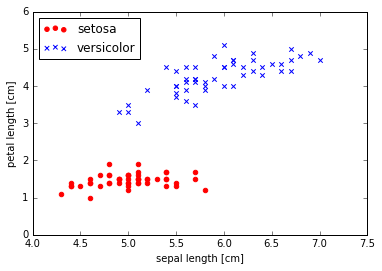

In [17]:
y = df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa',-1,1)
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
x_nor=np.copy(X)
x_nor[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
x_nor[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
ada=AdalineGD(n_iter=15,eta=0.01)
ada.fit(x_nor,y)

In [41]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors= ('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision suface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class sampls
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

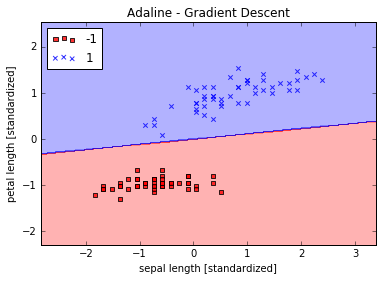

In [42]:
plot_decision_regions(x_nor,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [8]:
colors= ('red','blue','lightgreen','gray','cyan')
cmap=ListedColormap(colors[:len(np.unique(y))])
cmap

In [9]:
print (cmap)

In [10]:
colors[:len(np.unique(y))]

('red', 'blue')

In [13]:
cmap(0)

(1.0, 0.0, 0.0, 1.0)